In [1]:
#Import des 1ère bibliothèques nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# %matplotlib inline permet d'afficher le graphique directement sans avoir à rentrer plt.show()
%matplotlib inline  
plt.style.use('seaborn-v0_8')

In [2]:
#Import du dataset
df = pd.read_csv("BMW sales data (2010-2024) (1).csv")

In [3]:
#Affichage des 1ères lignes du dataset
df.head(10)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,High
7,M5,2014,Asia,Black,Diesel,Automatic,1.6,121156,102778,632,Low
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944,High
9,i8,2019,Europe,White,Electric,Manual,3.0,35700,96257,4411,Low


In [4]:
#Vérifier le type de chaque variable, présence ou non de valeur nulle
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [5]:
#Statistique descriptive rapide
df.describe(include='all')

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
count,50000,50000.000000,50000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000
unique,11,NaN,6,6,4,2,NaN,NaN,NaN,NaN,2
top,7 Series,NaN,Asia,Red,Hybrid,Manual,NaN,NaN,NaN,NaN,Low
freq,4666,NaN,8454,8463,12716,25154,NaN,NaN,NaN,NaN,34754
mean,NaN,2017.015700,NaN,NaN,NaN,NaN,3.247180,100307.203140,75034.600900,5067.514680,NaN
std,NaN,4.324459,NaN,NaN,NaN,NaN,1.009078,57941.509344,25998.248882,2856.767125,NaN
min,NaN,2010.000000,NaN,NaN,NaN,NaN,1.500000,3.000000,30000.000000,100.000000,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,2.400000,50178.000000,52434.750000,2588.000000,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.200000,100388.500000,75011.500000,5087.000000,NaN
75%,NaN,2021.000000,NaN,NaN,NaN,NaN,4.100000,150630.250000,97628.250000,7537.250000,NaN


In [6]:
#Vérifier le nombre de valeur nulle (même si vu plus haut qu'il y'en avait pas)
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [7]:
#Vérifier si présence de doublons
df.duplicated().sum()

np.int64(0)

In [8]:
#Nombre de valeur unique de chaque variable
df.nunique()

Model                      11
Year                       15
Region                      6
Color                       6
Fuel_Type                   4
Transmission                2
Engine_Size_L              36
Mileage_KM              44347
Price_USD               38246
Sales_Volume             9845
Sales_Classification        2
dtype: int64

In [9]:
for col in df.columns:
    uniques = df[col].unique()
    print(f"{col} — {len(uniques)} valeurs uniques")
    print(uniques)
    print("-" * 60)


Model — 11 valeurs uniques
['5 Series' 'i8' 'X3' '7 Series' 'M5' '3 Series' 'X1' 'M3' 'X5' 'i3' 'X6']
------------------------------------------------------------
Year — 15 valeurs uniques
[2016 2013 2022 2024 2020 2017 2014 2019 2012 2015 2011 2021 2023 2010
 2018]
------------------------------------------------------------
Region — 6 valeurs uniques
['Asia' 'North America' 'Middle East' 'South America' 'Europe' 'Africa']
------------------------------------------------------------
Color — 6 valeurs uniques
['Red' 'Blue' 'Black' 'Silver' 'White' 'Grey']
------------------------------------------------------------
Fuel_Type — 4 valeurs uniques
['Petrol' 'Hybrid' 'Diesel' 'Electric']
------------------------------------------------------------
Transmission — 2 valeurs uniques
['Manual' 'Automatic']
------------------------------------------------------------
Engine_Size_L — 36 valeurs uniques
[3.5 1.6 4.5 1.7 2.1 1.9 1.8 3.  2.4 3.8 2.3 2.6 3.1 3.7 4.8 3.3 3.2 2.2
 4.1 2.  4.7 4.3 4.  

In [10]:
# Traductions des variables
rename_map = {
    'Model': 'Modèle',
    'Year': 'Année',
    'Region': 'Région',
    'Color': 'Couleur',
    'Fuel_Type': 'Type de carburant',
    'Transmission': 'Transmission',
    'Engine_Size_L': 'Cylindrée (L)',          
    'Mileage_KM': 'Kilométrage (km)',         
    'Price_USD': 'Prix (USD)',                 
    'Sales_Volume': 'Volume de ventes',       
    'Sales_Classification': 'Classification des ventes'
}

# Traductions des modalités
value_maps = {
    'Fuel_Type': {
        'Petrol': 'Essence',
        'Diesel': 'Diesel',
        'Hybrid': 'Hybride',
        'Electric': 'Électrique'
    },
    'Transmission': {
        'Manual': 'Manuelle',
        'Automatic': 'Automatique'
    },
    'Region': {
        'North America': 'Amérique du Nord',
        'Europe': 'Europe',
        'Asia': 'Asie',
        'South America': 'Amérique du Sud',
        'Africa': 'Afrique',
        'Middle East': 'Moyen-Orient'  
    },
    'Sales_Classification': {
        'High': 'Élevé',
        'Low': 'Faible'
    },
    'Color': {
        'Red': 'Rouge',
        'Blue': 'Bleu',
        'Black': 'Noir',
        'Silver': 'Argent',
        'White': 'Blanc',
        'Grey': 'Gris',
    },
    'Model': {
        '3 Series': 'Série 3',
        '5 Series': 'Série 5',
        '7 Series': 'Série 7'
    }
}


In [11]:
# Application traductions de modalités 
df = df.replace(value_maps)

# Application traductions de variables 
df = df.rename(columns=rename_map)


In [12]:
#Vérif traduction
df.head()

,Modèle,Année,Région,Couleur,Type de carburant,Transmission,Cylindrée (L),Kilométrage (km),Prix (USD),Volume de ventes,Classification des ventes
0,Série 5,2016,Asie,Rouge,Essence,Manuelle,3.5,151748,98740,8300,Élevé
1,i8,2013,Amérique du Nord,Rouge,Hybride,Automatique,1.6,121671,79219,3428,Faible
2,Série 5,2022,Amérique du Nord,Bleu,Essence,Automatique,4.5,10991,113265,6994,Faible
3,X3,2024,Moyen-Orient,Bleu,Essence,Automatique,1.7,27255,60971,4047,Faible
4,Série 7,2020,Amérique du Sud,Noir,Diesel,Manuelle,2.1,122131,49898,3080,Faible


### KPIs ventes au global

In [13]:
# Nombre de vente total
print (f"Le nombre total de ventes est de {df['Volume de ventes'].sum():,}".replace(",", " "))

Le nombre total de ventes est de 253 375 734


In [14]:
# Total chiffre d'affaires
df['CA'] = df['Prix (USD)'] * df['Volume de ventes']
ca_total = df['CA'].sum()

print (f"Le chiffre d'affaire total s'élève à {ca_total:,} $ ".replace(",", " "))

Le chiffre d'affaire total s'élève à 19 012 242 534 459 $ 


In [52]:
# Evolution du revenue dans le temps
ca_annee=df.groupby('Année')['CA'].sum().reset_index()
print(ca_annee)

    Année             CA
0    2010  1261631480830
1    2011  1258944308614
2    2012  1257840248199
3    2013  1258599026870
4    2014  1269989867142
5    2015  1255056528796
6    2016  1284641854435
7    2017  1251237076544
8    2018  1244465589591
9    2019  1289342744664
10   2020  1226552860854
11   2021  1272402559079
12   2022  1344427738820
13   2023  1224302534555
14   2024  1312808115466


In [15]:
#Vérif ajout CA
df.head()

,Modèle,Année,Région,Couleur,Type de carburant,Transmission,Cylindrée (L),Kilométrage (km),Prix (USD),Volume de ventes,Classification des ventes,CA
0,Série 5,2016,Asie,Rouge,Essence,Manuelle,3.5,151748,98740,8300,Élevé,819542000
1,i8,2013,Amérique du Nord,Rouge,Hybride,Automatique,1.6,121671,79219,3428,Faible,271562732
2,Série 5,2022,Amérique du Nord,Bleu,Essence,Automatique,4.5,10991,113265,6994,Faible,792175410
3,X3,2024,Moyen-Orient,Bleu,Essence,Automatique,1.7,27255,60971,4047,Faible,246749637
4,Série 7,2020,Amérique du Sud,Noir,Diesel,Manuelle,2.1,122131,49898,3080,Faible,153685840


In [50]:
#Evolution des ventes selon les années, tout modèle confondu

evolution_ventes = df.groupby('Année')['Volume de ventes'].sum().reset_index()
print(evolution_ventes)

    Année  Volume de ventes
0    2010          16933445
1    2011          16758941
2    2012          16751895
3    2013          16866733
4    2014          16958960
5    2015          17010207
6    2016          16957550
7    2017          16620811
8    2018          16412273
9    2019          17191956
10   2020          16310843
11   2021          16884666
12   2022          17920946
13   2023          16268654
14   2024          17527854


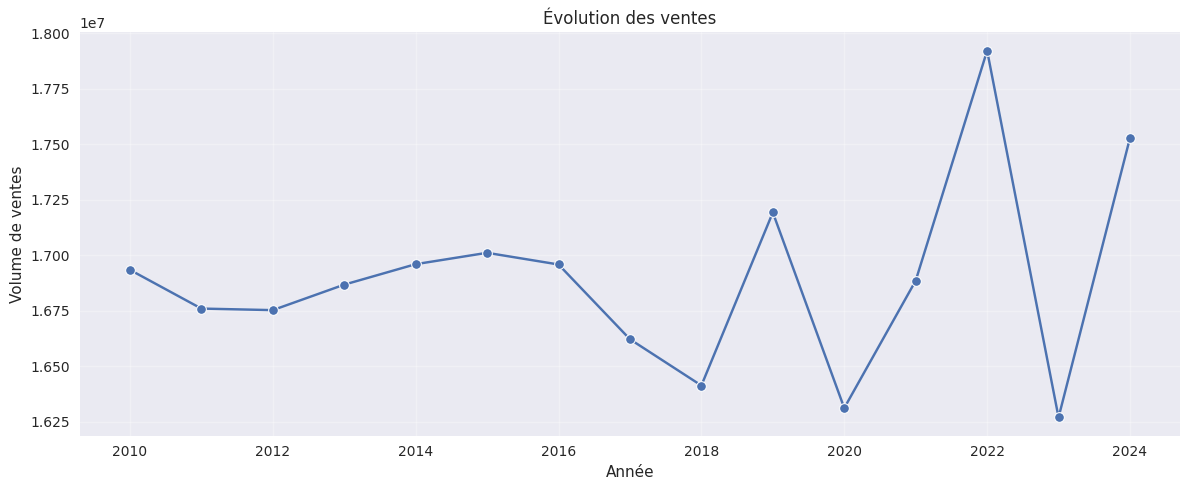

In [51]:
#Graphe évolution des ventes

plt.figure(figsize=(12,5))
sns.lineplot(data=evolution_ventes, x='Année', y='Volume de ventes', marker='o')
plt.title("Évolution des ventes")
plt.xlabel("Année"); plt.ylabel("Volume de ventes")
plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

### KPIs ventes par modèle

In [16]:
#Les différents modèles vendus
print(f"Les différents modèles vendus sont: {df['Modèle'].unique()}")

Les différents modèles vendus sont: ['Série 5' 'i8' 'X3' 'Série 7' 'M5' 'Série 3' 'X1' 'M3' 'X5' 'i3' 'X6']


In [ ]:
#Modèles les plus vendu selon l'année
ventes_par_modele = (
    df.groupby(['Année', 'Modèle'])['Volume de ventes']
      .sum()
      .reset_index()
)

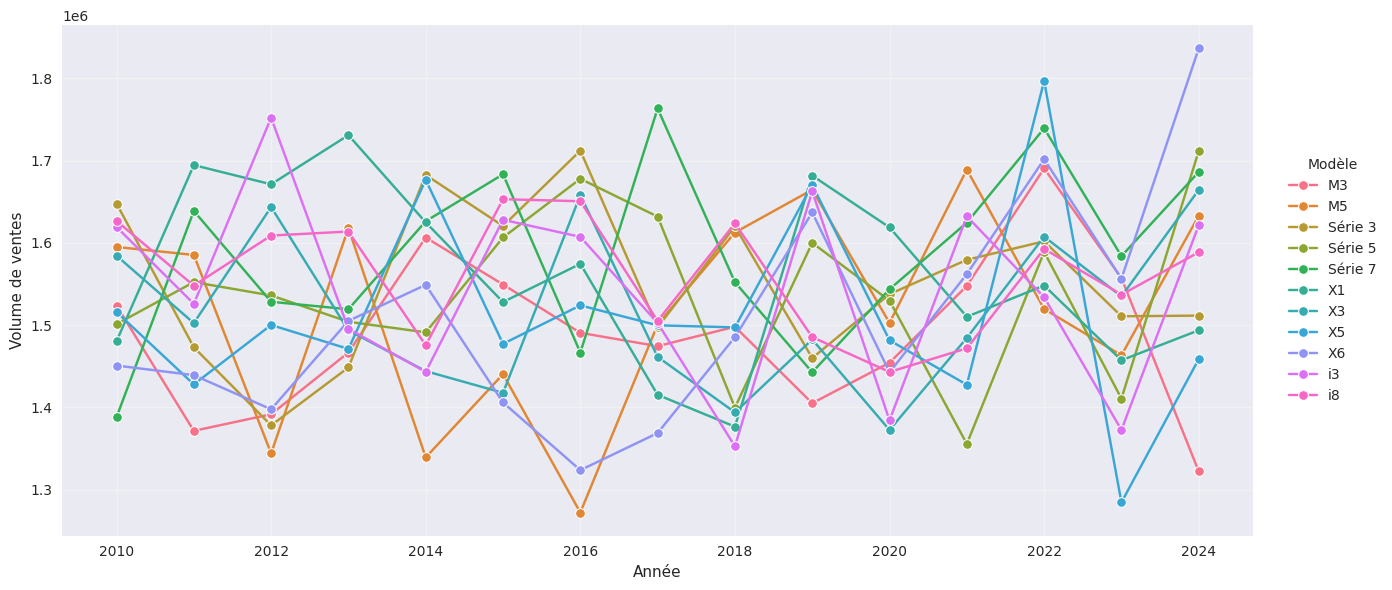

In [ ]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(
    data=ventes_par_modele, 
    x='Année', y='Volume de ventes',
    hue='Modèle', marker='o',
    errorbar=None
)

# légende à droite (à l'extérieur)
ax.legend(title='Modèle', loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.grid(True, alpha=0.3)
plt.tight_layout()  
plt.show()

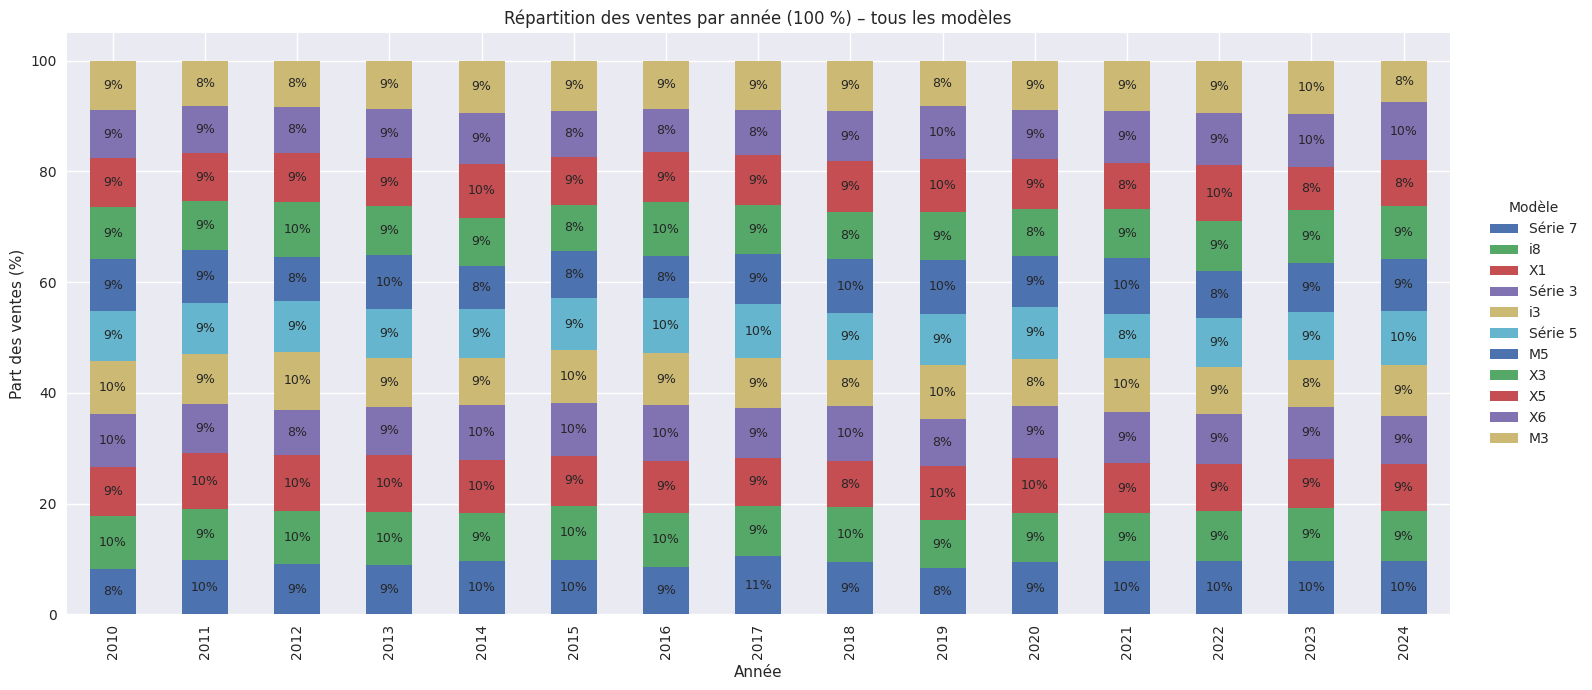

In [ ]:
# Matrice Année × Modèle
pivot = (df.groupby(['Année','Modèle'])['Volume de ventes']
           .sum()
           .unstack(fill_value=0)
           .sort_index())

# ordre constant des couches
order = pivot.sum(axis=0).sort_values(ascending=False).index
pivot = pivot[order]

# Convertir en pourcentage 
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Barres empilées à 100 %
fig, ax = plt.subplots(figsize=(16,7))
pivot_pct.plot(kind='bar', stacked=True, ax=ax)

ax.set_title("Répartition des ventes par année (100 %) – tous les modèles")
ax.set_xlabel("Année")
ax.set_ylabel("Part des ventes (%)")
ax.set_yticks([0,20,40,60,80,100])

# Légende à droite
ax.legend(title="Modèle", bbox_to_anchor=(1.02, 0.5), loc="center left")

# Étiquettes % au centre de chaque segment 
threshold = 4  
for i, year in enumerate(pivot_pct.index):
    cum = 0
    for model in pivot_pct.columns:
        val = pivot_pct.loc[year, model]
        if val >= threshold:
            ax.text(i, cum + val/2, f"{val:.0f}%", ha="center", va="center", fontsize=9)
        cum += val

plt.tight_layout()
plt.show()



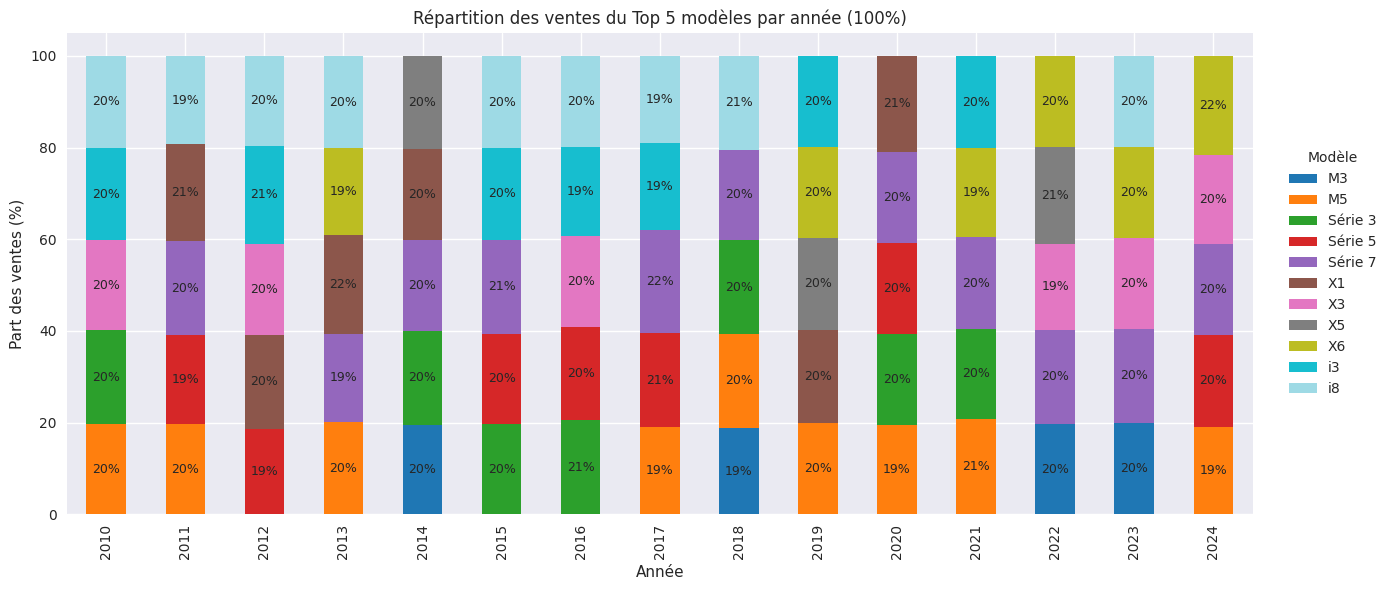

In [33]:
ventes_par_modele = ventes_par_modele.sort_values(['Année', 'Volume de ventes'], ascending=[True, False])

#5 premiers modèles les plus vendus pour chaque année
top5_par_annee = ventes_par_modele.groupby('Année').head(5)

pivot = (
    top5_par_annee
    .pivot_table(index='Année', columns='Modèle', values='Volume de ventes', aggfunc='sum', fill_value=0)
)

# Convertir en pourcentages
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100


# Tracer le graphique empilé à 100%
fig, ax = plt.subplots(figsize=(14,6))
pivot_pct.plot(kind='bar', stacked=True, ax=ax, cmap='tab20')

ax.set_title("Répartition des ventes du Top 5 modèles par année (100%)")
ax.set_xlabel("Année")
ax.set_ylabel("Part des ventes (%)")
ax.set_yticks([0,20,40,60,80,100])
ax.legend(title="Modèle", bbox_to_anchor=(1.02, 0.5), loc="center left")


# Ajouter les labels % dans les segments
threshold = 4  # pour n'afficher que les parts >= 4%
for i, year in enumerate(pivot_pct.index):
    bottom = 0
    for model in pivot_pct.columns:
        value = pivot_pct.loc[year, model]
        if value >= threshold:
            ax.text(
                i, bottom + value/2, f"{value:.0f}%",
                ha='center', va='center', fontsize=9
            )
        bottom += value

plt.tight_layout()
plt.show()


In [31]:
#Couleurs vendues pour chaque modèle

couleur_col = "Couleur"  

for model in sorted(df['Modèle'].dropna().unique()):
    s = (
        df.loc[df['Modèle'] == model, couleur_col]
          .dropna()
          .astype(str).str.strip().str.lower()
    )
    uniques = sorted({u.capitalize() for u in s})
    print(f"Les couleurs vendues pour le modèle {model} sont — {', '.join(uniques) or '(aucune)'}")


Les couleurs vendues pour le modèle M3 sont — Argent, Blanc, Bleu, Gris, Noir, Rouge
Les couleurs vendues pour le modèle M5 sont — Argent, Blanc, Bleu, Gris, Noir, Rouge
Les couleurs vendues pour le modèle Série 3 sont — Argent, Blanc, Bleu, Gris, Noir, Rouge
Les couleurs vendues pour le modèle Série 5 sont — Argent, Blanc, Bleu, Gris, Noir, Rouge
Les couleurs vendues pour le modèle Série 7 sont — Argent, Blanc, Bleu, Gris, Noir, Rouge
Les couleurs vendues pour le modèle X1 sont — Argent, Blanc, Bleu, Gris, Noir, Rouge
Les couleurs vendues pour le modèle X3 sont — Argent, Blanc, Bleu, Gris, Noir, Rouge
Les couleurs vendues pour le modèle X5 sont — Argent, Blanc, Bleu, Gris, Noir, Rouge
Les couleurs vendues pour le modèle X6 sont — Argent, Blanc, Bleu, Gris, Noir, Rouge
Les couleurs vendues pour le modèle i3 sont — Argent, Blanc, Bleu, Gris, Noir, Rouge
Les couleurs vendues pour le modèle i8 sont — Argent, Blanc, Bleu, Gris, Noir, Rouge


In [36]:
# Nombre de vente selon le type de transmission

for trans in sorted(df['Transmission'].unique()):
    total = df.loc[df['Transmission'] == trans, 'Volume de ventes'].sum()
    print(f"Le nombre de voitures vendues en transmission {trans} est {total:,}".replace(",", " "))


Le nombre de voitures vendues en transmission Automatique est 126 013 657
Le nombre de voitures vendues en transmission Manuelle est 127 362 077


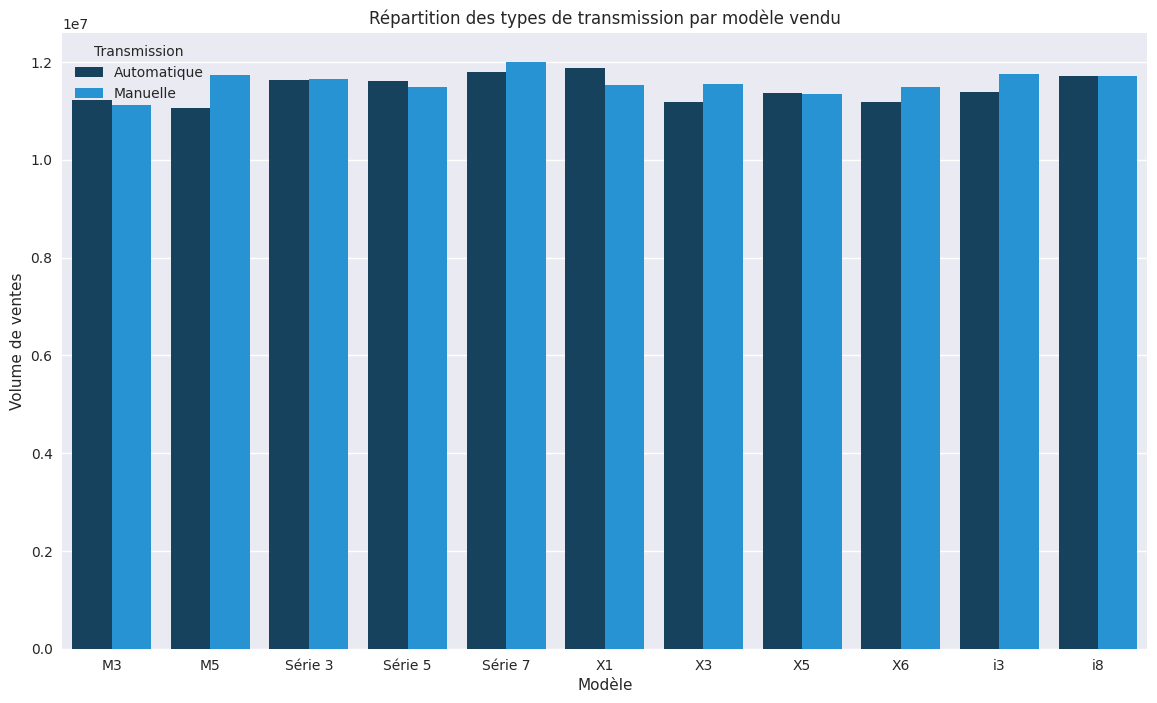

In [49]:
# Type de transmission selon les modèles
type_transmission_modele = df.groupby(['Modèle','Transmission'])['Volume de ventes'].sum().reset_index()

plt.figure(figsize = (14,8))
sns.barplot(data = type_transmission_modele,x = 'Modèle',y = 'Volume de ventes',hue = 'Transmission',palette = ["#0A4569","#0B9BEE"])
plt.title("Répartition des types de transmission par modèle vendu")
plt.show()

In [39]:
# Ranking des modèles selon les ventes 
top_models=(
    df.groupby('Modèle')['Volume de ventes']
      .sum()
      .reset_index()
      .sort_values('Volume de ventes', ascending=False)
)

print(top_models)

     Modèle  Volume de ventes
4   Série 7          23786466
10       i8          23423891
5        X1          23406060
2   Série 3          23281303
9        i3          23133849
3   Série 5          23097519
1        M5          22779688
6        X3          22745529
7        X5          22709749
8        X6          22661986
0        M3          22349694


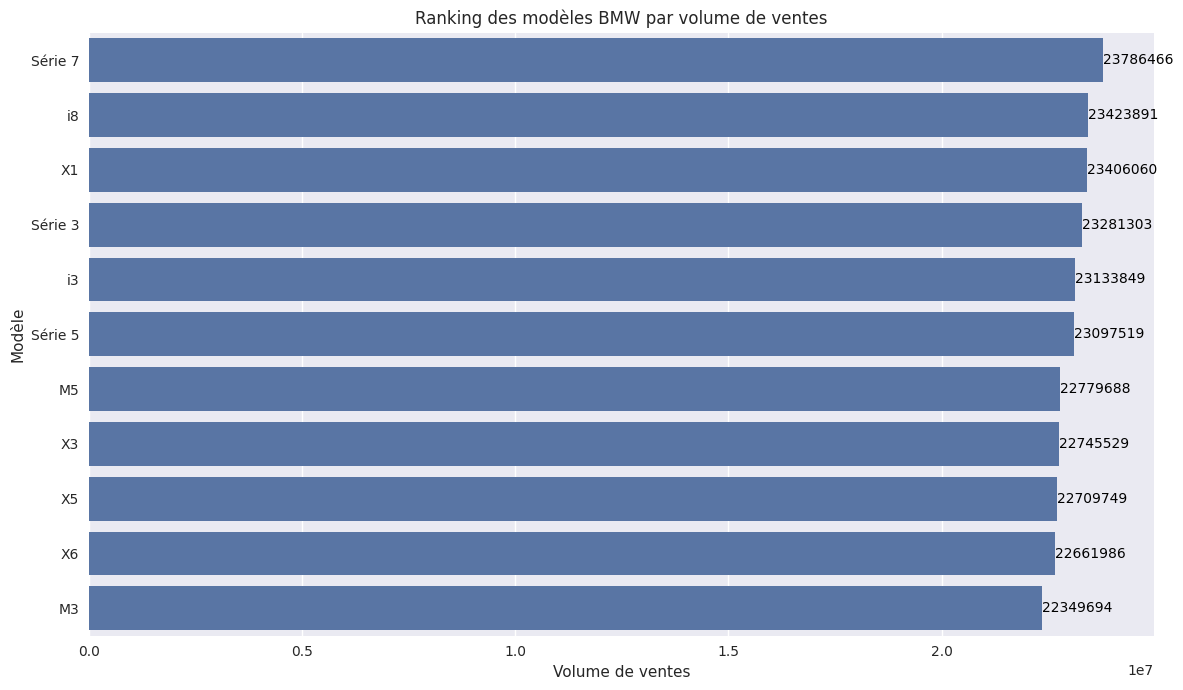

In [40]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=top_models, y='Modèle', x='Volume de ventes')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, color='black')

plt.title("Ranking des modèles BMW par volume de ventes")
plt.xlabel("Volume de ventes")
plt.ylabel("Modèle")
plt.tight_layout()
plt.show()

### KPIs ventes par région

In [44]:
#ventes par région

ventes_region=(
    df.groupby('Région')['Volume de ventes']
    .sum()
    .reset_index()
    .sort_values(by='Volume de ventes', ascending=False)
)
print(ventes_region)

             Région  Volume de ventes
3              Asie          42974277
4            Europe          42555138
1  Amérique du Nord          42402629
5      Moyen-Orient          42326620
0           Afrique          41565252
2   Amérique du Sud          41551818


In [53]:
#Export fichier clean
df.to_csv('bmw_sales_clean.csv', index=False)